## Problem Statement

Your short description should include:

#### Assets

Assets - GME, AMC, NFLX, and MVIS<br/>
Dates = 1/1/17 - 6/1/21<br/>

#### Strategy Comparison
i) Equal Weighted Strategy and Inverse Volatility Strategy<br/>
ii) SMA Strategy Vs Mean Reversion Strategy
iii) If SMA Strategy produces the best results try to find<br/> the best case period for which returns are maximized


In [1]:
import pandas as pd
import bt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Constants

In [3]:
tickers = 'GME, AMC, NFLX, MVIS'
start_date = '2017-01-01'
end_date = '2021-06-01'

### Get Pricing Data

In [4]:
price_data = bt.get(tickers, start = start_date, end = end_date)
sma_50 = price_data.rolling(50).mean()
price_data

,gme,amc,nflx,mvis
Date,,,,
2017-01-03,20.631744,27.085871,127.489998,1.290000
2017-01-04,21.079023,26.657171,129.410004,1.370000
2017-01-05,20.330847,26.501284,131.809998,1.400000
2017-01-06,19.940495,26.345388,131.070007,1.300000
2017-01-09,19.916096,25.955666,130.949997,1.300000
...,...,...,...,...
2021-05-25,209.429993,16.410000,501.339996,15.630000
2021-05-26,242.559998,19.559999,502.359985,14.760000
2021-05-27,254.130005,26.520000,503.859985,15.830000


### Equal Weighted Strategy Vs Inverse Volatility Strategy vs Above SMA Strategy

In [5]:
equal_weight_strategy = bt.Strategy('Equal_Weight',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()
                            ])

In [6]:
inverse_volatility_strategy = bt.Strategy('Inverse_Volatility',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighInvVol(),
                              bt.algos.Rebalance()
                            ])

In [7]:
above_sma_strategy = bt.Strategy('AboveSMA_50day_period',
                         [
                             bt.algos.RunMonthly(),
                             bt.algos.SelectWhere(price_data > sma_50),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()
                         ])

In [8]:
# Equal Weight Back test
bt_eq_weight_backtest = bt.Backtest(equal_weight_strategy, price_data)
# Inverse Inverse Volatility Backtest
bt_inv_vol_backtest = bt.Backtest(inverse_volatility_strategy, price_data)
# Above SMA Back test
bt_above_sma_test = bt.Backtest(above_sma_strategy, price_data)

In [9]:
bt_res = bt.run(bt_eq_weight_backtest, bt_inv_vol_backtest)

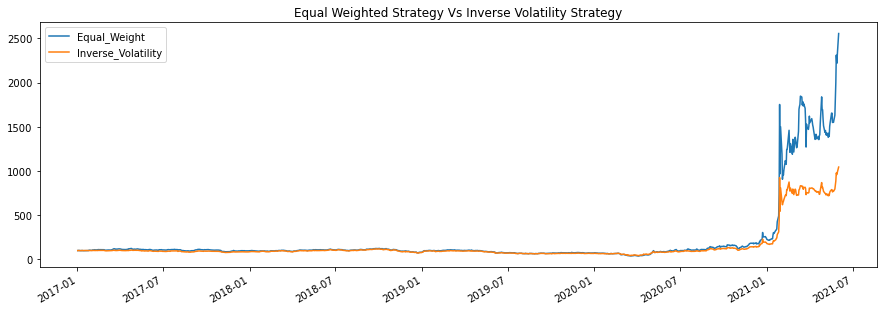

In [10]:
bt_res.plot(title="Equal Weighted Strategy Vs Inverse Volatility Strategy")
plt.show()

### Winner of Equal Weight Vs Inverse Volatility is  Equal Weight

Now let's compare the Winner "Equal Weight Strategy" with the Above SMA Strategy

In [11]:
bt_res = bt.run(bt_eq_weight_backtest, bt_above_sma_test)

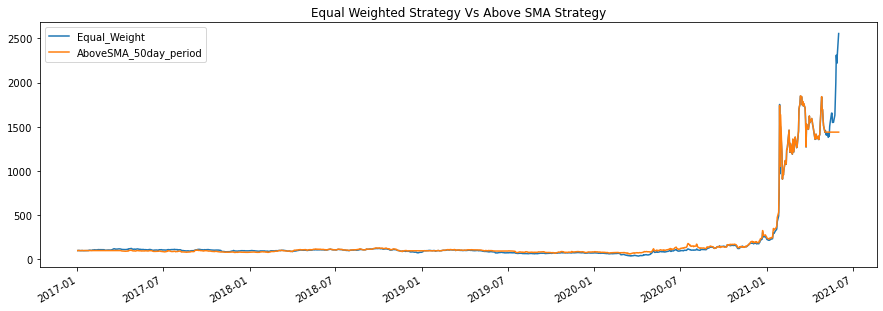

In [12]:
bt_res.plot(title="Equal Weighted Strategy Vs Above SMA Strategy")
plt.show()

### Winner of this Battle is Above SMA Strategy 

Next Step let's compare the best sma period with different period and let's measure if it makes any difference

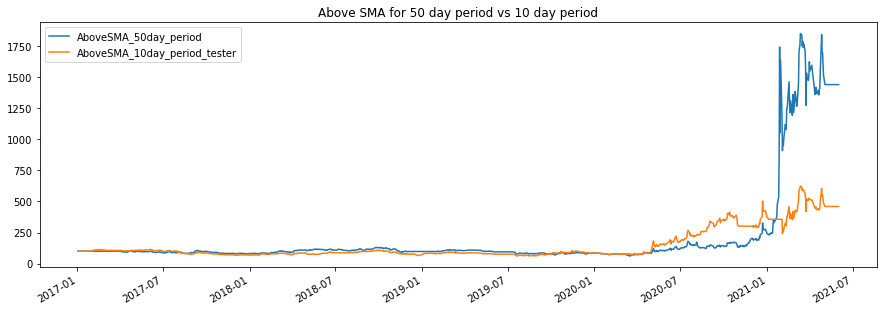

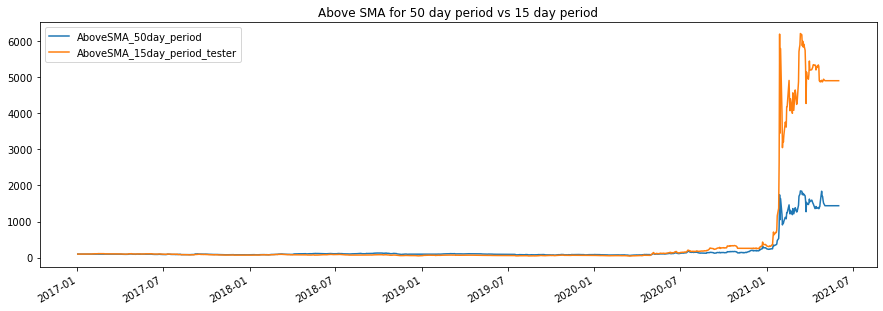

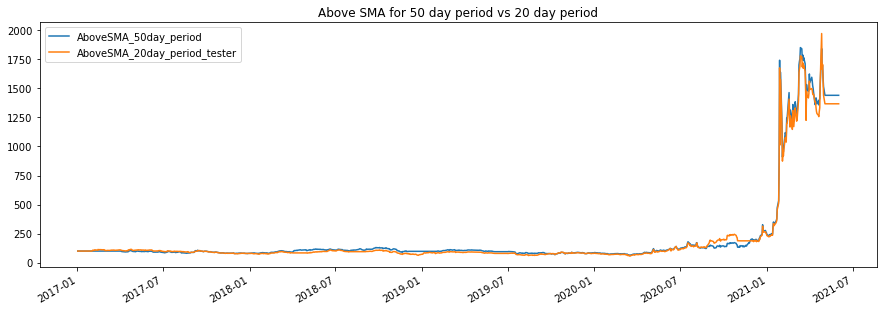

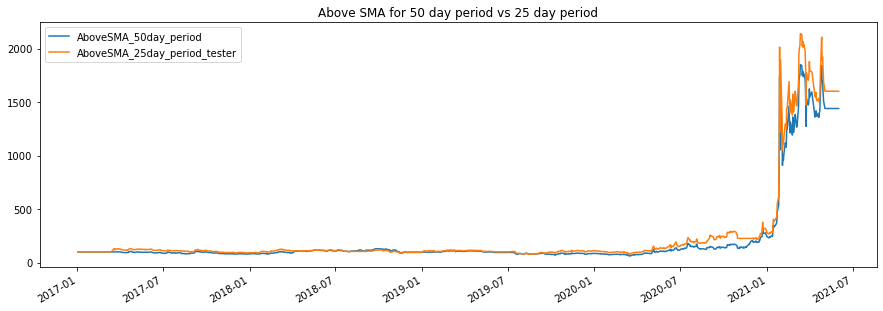

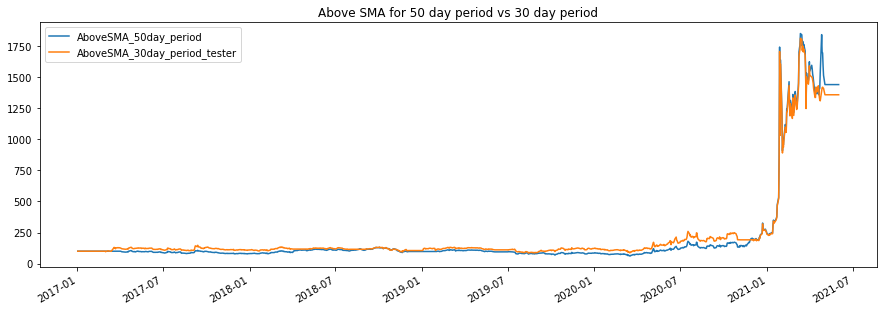

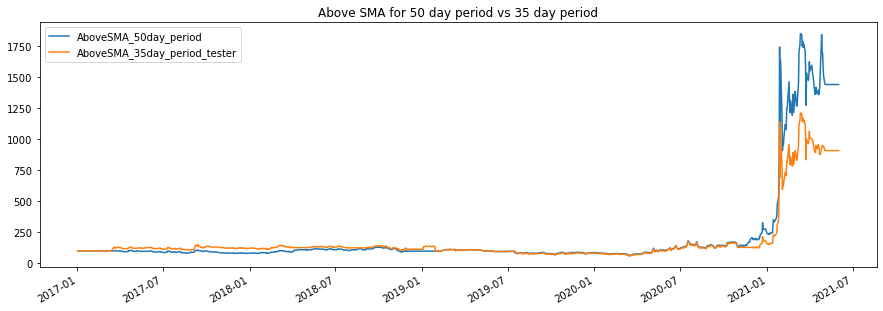

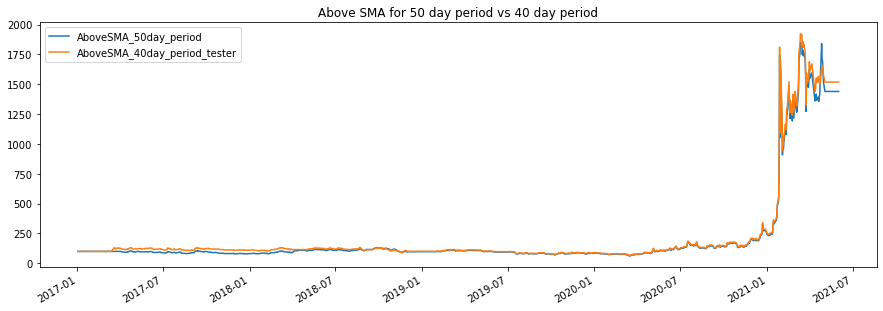

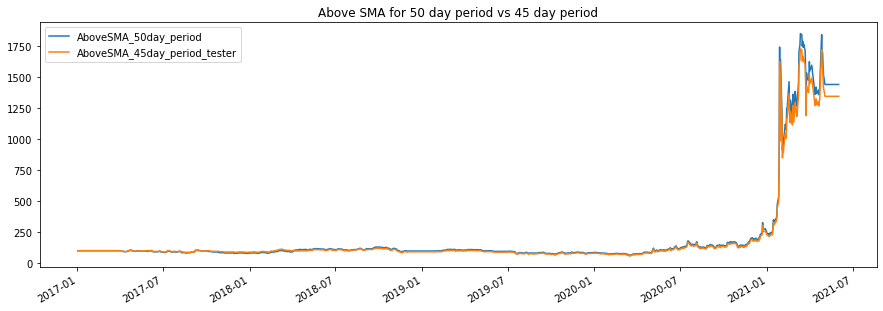

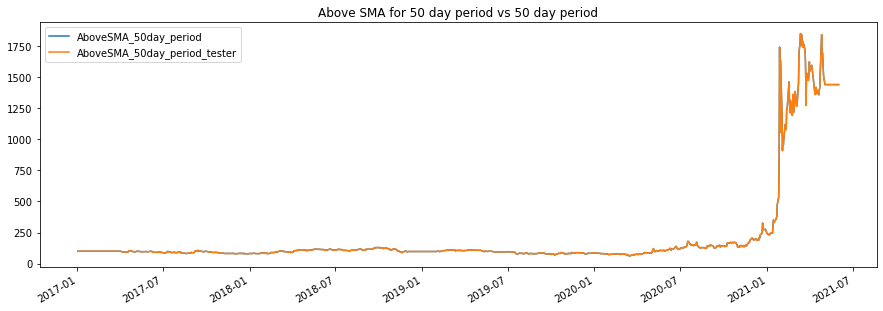

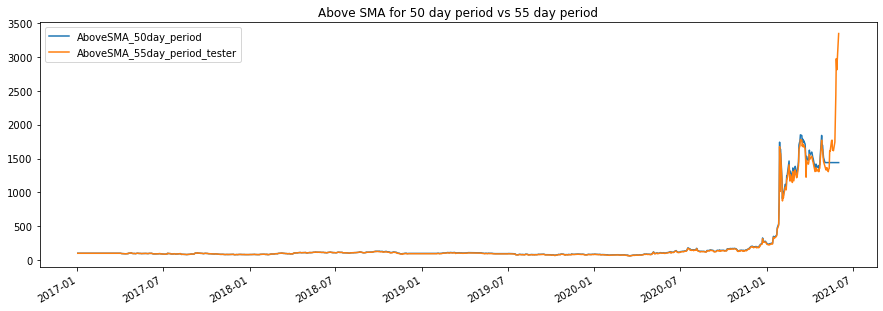

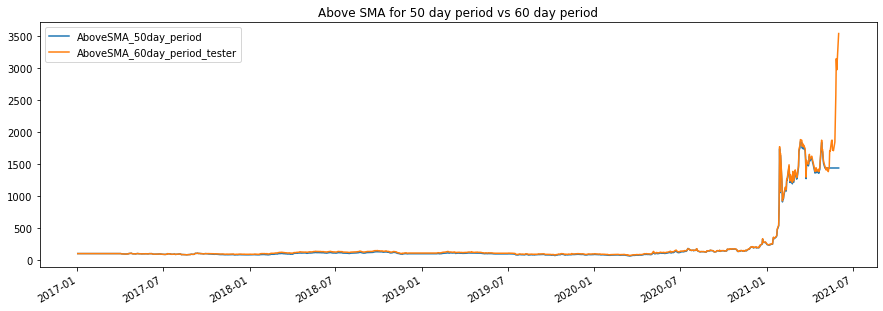

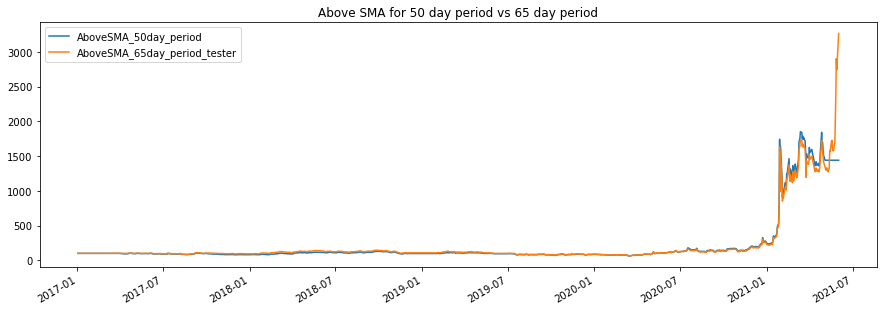

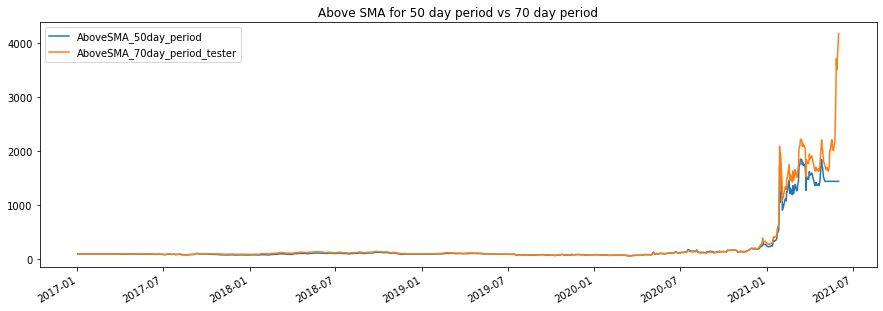

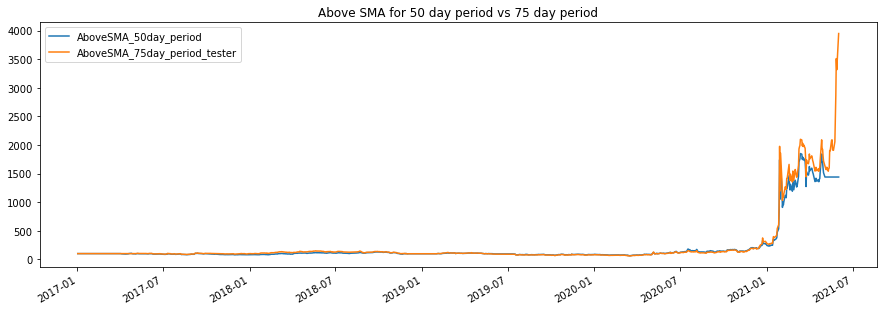

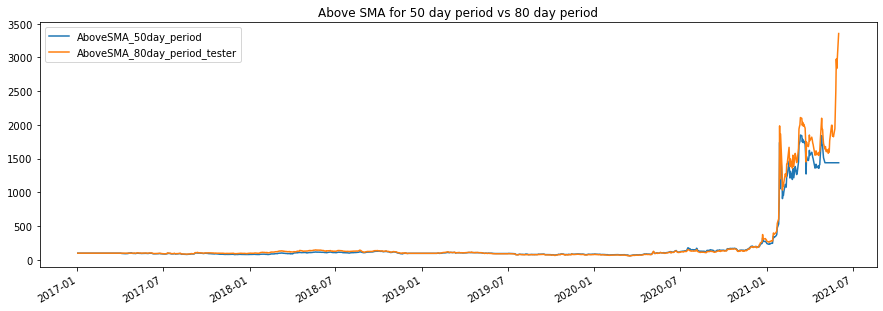

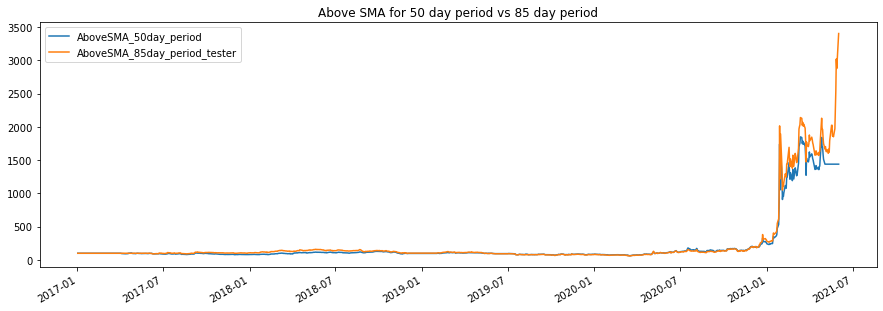

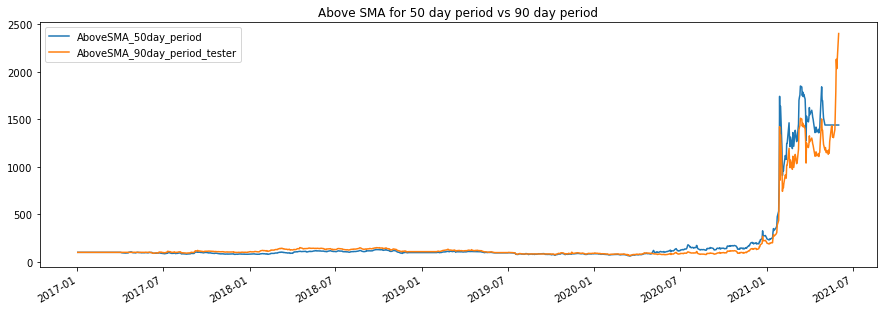

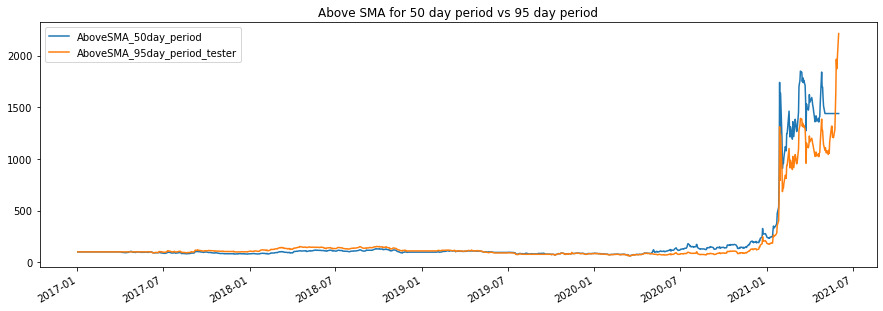

In [13]:
for i in range(10,100,5):
    sma_test_period = price_data.rolling(i).mean()
    above_sma_strategy_tester = bt.Strategy('AboveSMA_'+str(i)+"day_period_tester",
                     [
                         bt.algos.RunMonthly(),
                         bt.algos.SelectWhere(price_data > sma_test_period),
                         bt.algos.WeighEqually(),
                         bt.algos.Rebalance()
                     ])
    bt_above_sma_testperiod = bt.Backtest(above_sma_strategy_tester, price_data)
    bt_res = bt.run(bt_above_sma_test, bt_above_sma_testperiod)
    bt_res.plot(title="Above SMA for 50 day period vs " + str(i) + " day period")
    plt.show()

### Answer - Above SMA Strategy for a period of 15 days is the best case scenario where the returns are maximized